# Week 9-10 Charts - Python

author: Rodrigo Rodriguez

date: 5/14/2024

## 5.2 Exercises: Heat Maps, Spatial Charts, and Lollipop Charts

**Instructions)**

Generate the following from the practice datasets.

1 heat map, 1 spatial chart and 1 lollipop chart using Python

**Answer)**

### *Plots*

*Reading and opening the data*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data
costcos = pd.read_csv('C:/Users/ivan2/OneDrive/Documents/School/BU/DSC 640 Data Presentation - Visualization/Sample Datasets/ex5-2/costcos-geocoded.csv')
costcos.head(5)

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [2]:
costcos.dtypes

Address       object
City          object
State         object
Zip Code      object
Latitude     float64
Longitude    float64
dtype: object

In [3]:
# reading the data
ppg = pd.read_csv('C:/Users/ivan2/OneDrive/Documents/School/BU/DSC 640 Data Presentation - Visualization/Sample Datasets/ex5-2/ppg2008.csv')
ppg.head(5)

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [4]:
ppg.dtypes

Name       object
G           int64
MIN       float64
PTS       float64
FGM       float64
FGA       float64
FGP       float64
FTM       float64
FTA       float64
FTP       float64
3PM       float64
3PA       float64
3PP       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TO        float64
PF        float64
dtype: object

 Now I’ll create the Heat Map

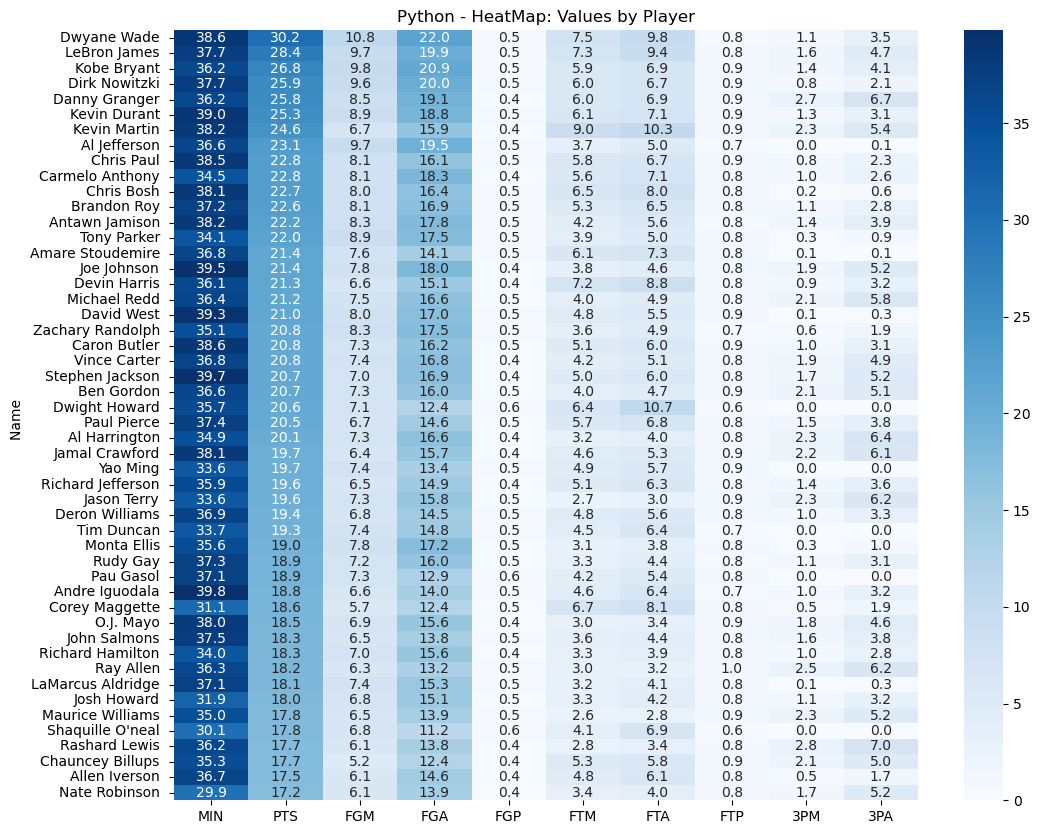

In [5]:
# selecting relevant columns including 'Name'
# excluding 'G' for better heatmap visuals
heatmap_data = ppg[['Name  ', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP', 'FTM', 'FTA', 'FTP', '3PM', '3PA']]

# seting the 'Name' column as the index
heatmap_data = heatmap_data.set_index('Name  ')

# convert all data to float type for the heatmap
heatmap_data = heatmap_data.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".1f")
plt.title('Python - HeatMap: Values by Player')
plt.show()


 Now I’ll create the Spatial Chart.

C:\Users\ivan2\AppData\Local\Temp\ipykernel_29272\2127737170.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sorted_data['Name  '], sorted_data['PTS'], basefmt=" ", use_line_collection=True)


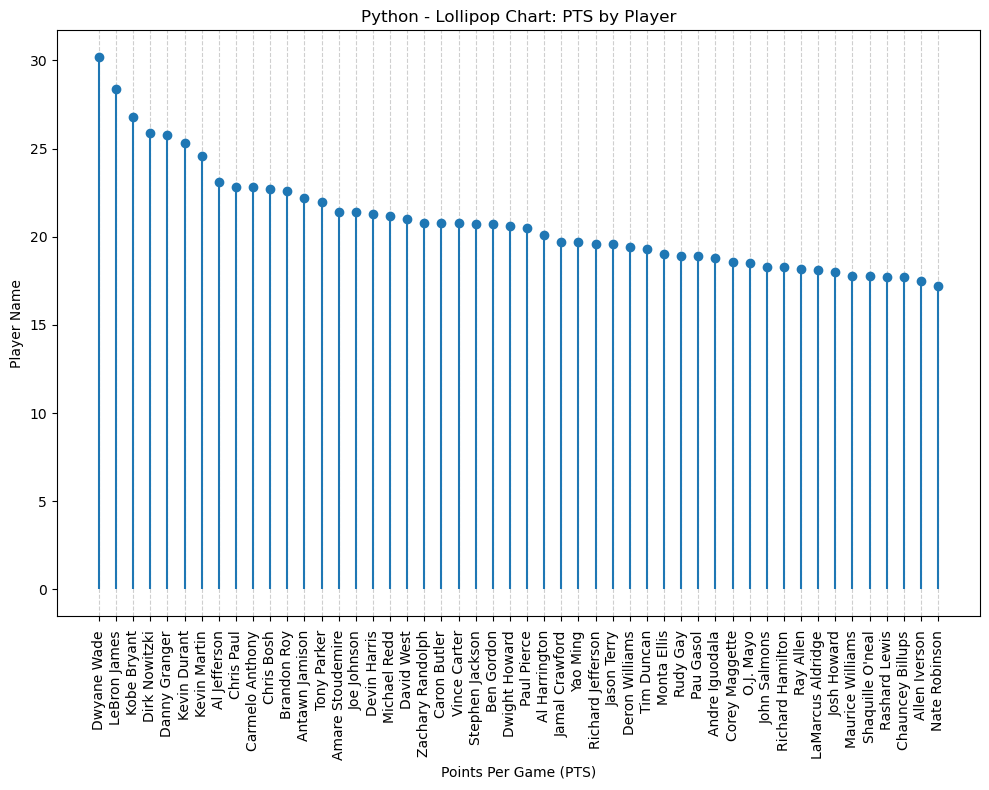

In [6]:
# sortinb by 'PTS' in descending order
sorted_data = ppg.sort_values('PTS', ascending=False)

# plotting the chart
plt.figure(figsize=(10, 8))
plt.stem(sorted_data['Name  '], sorted_data['PTS'], basefmt=" ", use_line_collection=True)
plt.xlabel('Points Per Game (PTS)')
plt.ylabel('Player Name')
plt.title('Python - Lollipop Chart: PTS by Player')
plt.xticks(rotation=90)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  # Adding a grid for better readability
plt.tight_layout()
plt.show()

Now I'll create the Spatial Map Chart.

In [7]:
# using folium to build the map
import folium

In [8]:
# creating a base map
map_folium = folium.Map(location=[34.7304, -86.5861], zoom_start=6)

# adding the markers for each location
for idx, row in costcos.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['City']).add_to(map_folium)

# displaying the map
map_folium